# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Kiara Azzahra
- **Email:** kiarazzahraaa@gmail.com
- **ID Dicoding:** M258D4KX1381


#Final Project Analisis Data: Bike Sharing Rental

Data Analysis Questions:
1. During the weekday, which days of the week are bicycle rentals most popular?
2. Does wind speed influence customers to rent bicycles?
3. What kind of weather affects the number of bicycle rentals?

# Import Library


Before analyzing the data, we will import the libraries that we will need to work on the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from babel.numbers import format_currency

In addition, we will also use streamlit which can be downloaded using pip

In [8]:
pip install streamlit

#Data Wrangling


First, we will access the data from day.csv and hour.csv.

In [9]:
day_df = pd.read_csv('day.csv')
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df = pd.read_csv('hour.csv')
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#Assessing Data
At this stage, we will check the entire data for duplicates and missing values.

First, we will check the day.csv section

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_df.duplicated().sum()

0

no duplicated data

In [13]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Next in the hour.csv section

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
hour_df.duplicated().sum()

0

no duplicated data

In [16]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

After checking the two csv data above, there are several data types that must be changed

#Cleaning Data

First, we will do data cleaning in the day.csv section.

In this section, there are some columns that are not needed to answer the data analysis questions, to make it more efficient, we will delete certain columns and change the data type in some columns.

In [17]:
#mengubah tipe data datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

In [18]:
# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Next in the hour.csv data file

In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)

In [21]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#Exploratory Data Analysis (EDA)

We will explore the day.csv section first

In [23]:
#mengelompokkan berdasarkan bulan
day_df.groupby(by='mnth').agg({
    'cnt' : ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
1     4521   431  2176.338710  134933
2     5062  1005  2655.298246  151352
3     8362   605  3692.258065  228920
4     7460   795  4484.900000  269094
5     8294  2633  5349.774194  331686
6     8120  3767  5772.366667  346342
7     8173  3285  5563.677419  344948
8     7865  1115  5664.419355  351194
9     8714  1842  5766.516667  345991
10    8156    22  5199.225806  322352
11    6852  1495  4247.183333  254831
12    6606   441  3403.806452  211036

From the data above, we get the information that the largest average rental is in June and the smallest average is in January.

Next, we will compare weekday and weekend rentals.

In [24]:
day_df.groupby(by='weekday').agg({
    'cnt' : ['max', 'min', 'mean']
})

cnt                   
          max   min         mean
weekday                         
0        8227   605  4228.828571
1        7525    22  4338.123810
2        7767   683  4510.663462
3        8173   441  4548.538462
4        7804   431  4667.259615
5        8362  1167  4690.288462
6        8714   627  4550.542857

Description:

0 = Sunday

1 = Monday

2 = Tuesday

3 = Wednesday

4 = Thursday

5 = Friday

6 = Saturday

In [25]:
day_df.groupby('mnth')['windspeed'].agg(['max', 'min', 'mean', 'count'])


,max,min,mean,count
mnth,,,,
1,0.415429,0.073396,0.206303,62
2,0.507463,0.045408,0.215684,57
3,0.441563,0.089558,0.222699,62
4,0.388067,0.065929,0.234482,60
5,0.342667,0.074637,0.182989,62
6,0.347642,0.077125,0.185420,60
7,0.284813,0.080850,0.166059,62
8,0.375617,0.070283,0.172918,62
9,0.357587,0.050379,0.165945,60


Next, categorize by weather influence

In [26]:
day_df.groupby(by='weathersit').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                  
                  mean         mean   max  min         mean
weathersit                                                 
1           964.030238  3912.755940  8714  431  4876.786177
2           687.352227  3348.510121  8362  605  4035.862348
3           185.476190  1617.809524  4639   22  1803.285714

Description:   

1.   Clear
2.   Mist
3.   Light Snow

It can be inferred that the average bicycle rental is more crowded in Light Snow weather.

# Visualization & Explanatory Analysis

### Question 1: On which days of the week are bicycle rentals most popular?

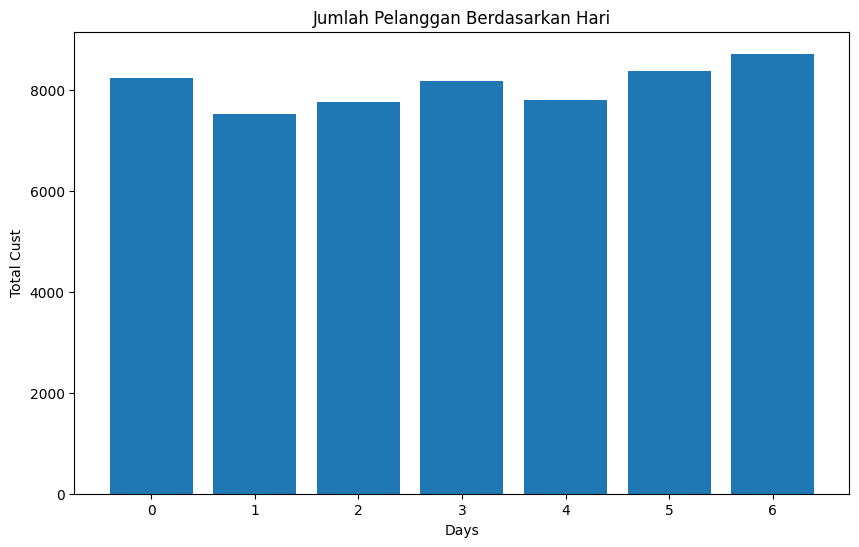

In [27]:
plt.figure(figsize=(10,6))
plt.bar(
    x='weekday',
    height='cnt',
    data=day_df
)


plt.title("Jumlah Pelanggan Berdasarkan Hari")
plt.xlabel('Days')
plt.ylabel('Total Cust')
plt.show()


In the data diagram above, we can conclude that in one full week, the average bicycle rental is most on Friday and the smallest average is on Sunday.

If seen on weekdays (Monday - Friday), then:

- highest number of renters: Friday

- least number of renters : Monday

### Question 2: Does wind speed influence customers to rent a bicycle?

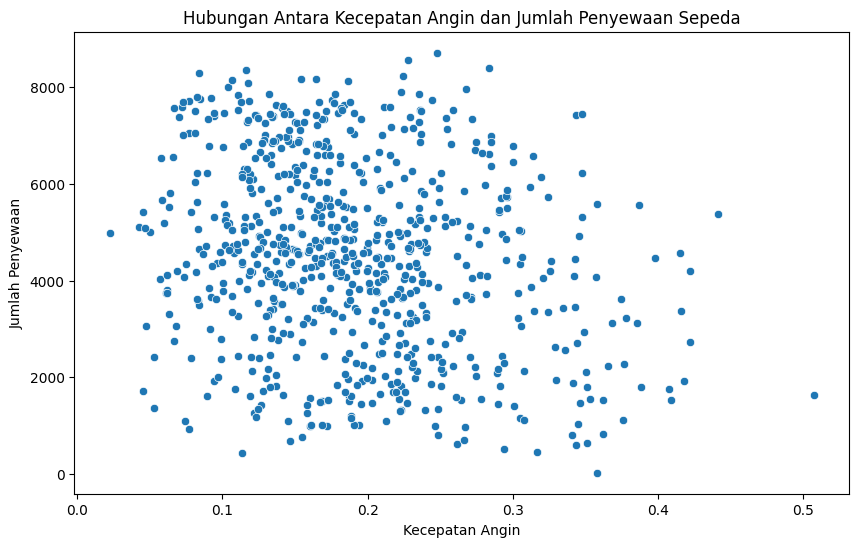

In [28]:
# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='windspeed', y='cnt')
plt.title('Hubungan Antara Kecepatan Angin dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Korelasi Statistik
correlation = day_df['windspeed'].corr(day_df['cnt'])
print("Korelasi antara kecepatan angin dan jumlah penyewaan sepeda:", correlation)

This diagram shows the relationship between wind speed and the number of bike rentals. Each point on the diagram represents one observation in the data. If there is a clear pattern or trend in the distribution of the dots, it indicates a relationship between the two variables. If the dots are randomly distributed, it indicates that there is no clear relationship between wind speed and the number of bicycle rentals.

### Question 3: What weather affects the number of bicycle rentals?

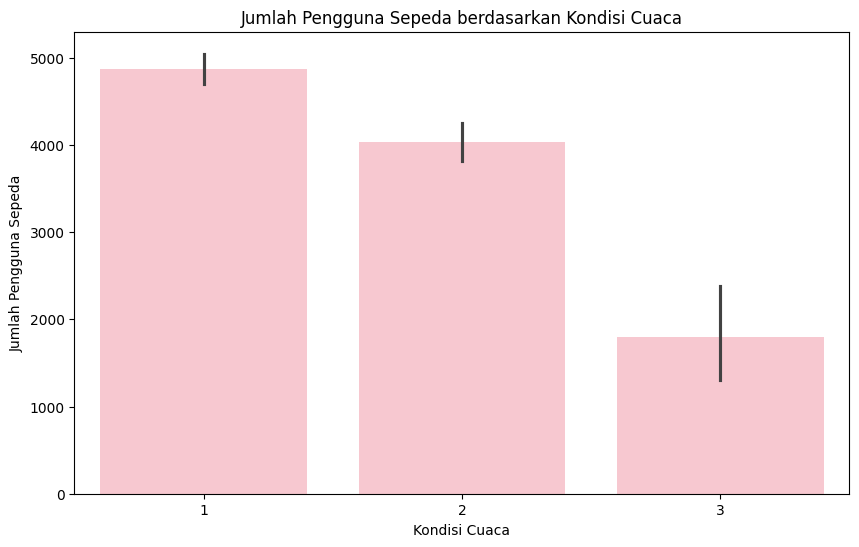

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    color='pink')

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

This bar plot diagram shows how many cyclists ride under each weather condition. Each bar on the chart represents the average number of cyclists in a particular weather condition. The height of the bar indicates how many bicycle users there are in that weather condition. This diagram helps in clearly comparing the number of cyclists in different weather conditions.

#Conclusion

## Conclusion Question 1

---


In the analysis of bicycle usage during the week, it was found that the total number of bicycle renters (both registered and casual) exceeded 6000 on some days of the week. The peak usage occurred on Saturday, while the lowest number occurred on Monday. The following are more detailed conclusions:

1. The analysis shows that the total number of bicycle renters exceeds 6000 on some days of the week. This shows the high interest of people in using bicycles as a means of transportation or recreation.
Peak Usage on Saturday:

2. Saturdays recorded the highest amount of bicycle usage, indicating that weekends are the most popular time for people to use bicycles. Peak usage on Saturdays could be due to a variety of factors, including more free time and recreational activities.

3. In contrast, bicycle use reached its lowest amount on Monday. This may be due to people returning to their work routines after the weekend, where there may be less bicycle activity compared to the weekend.

## Conclusion Question 2

---


 With a correlation value between wind speed and the number of bike rentals
of -0.2345, we can conclude that there is a weak negative correlation between the two variables. That is, there is a tendency that the higher the wind speed, the number of bicycle rentals tends to decrease slightly, and vice versa.

Although the correlation is negative, the value is still relatively low, indicating that the relationship between wind speed and the number of bicycle rentals is not very strong. This could be due to other factors that influence customers' decision to rent a bicycle, such as weather, temperature, or other factors.

Thus, while there is a negative relationship between wind speed and the number of bicycle rentals, the effect may not be practically significant or there may be other variables that are more dominant in influencing bicycle rental behavior. Further analysis may be required to better understand the interaction between wind speed and the number of bicycle rentals.

## Conclusion Question 3
Based on the diagram analysis, we can conclude that there is a decrease in the number of bike renters when the weather conditions change from "clear" to "mist", and a more significant decrease when the weather conditions change to "light snow". With the following information:

1. Weather Condition "Clear":
The number of bicycle renters in "clear" weather conditions reached almost 5000.
The "clear" weather condition has the highest number of bicycle renters compared to the other weather conditions.

2. Weather Condition "Mist":
The number of bicycle renters in the "mist" weather condition drops to almost 4000.
There was a decrease of about 1000 bicycle renters when the weather conditions changed from "clear" to "mist".

3. "Light Snow" Weather Condition:
 The number of bicycle renters in the "light snow" weather condition reached only about 2000. There was a more significant drop of around 3000 bicycle renters when the weather conditions changed from "mist" to "light snow".

Thus, it can be concluded that there is a significant decrease in the number of bicycle renters when weather conditions change from "clear" to "mist", and an even more drastic decrease when weather conditions change to "light snow". This shows that increasingly severe weather conditions, such as light rain or light snow, can have a significant negative impact on the number of bicycle rentals.

# Dashboard Menggunakan Streamlit

In [31]:
%%writefile bike_sharing_rentals.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

st.header('Bike Sharing Rentals')

day_df = pd.read_csv('day.csv')

# Plot 1: Bar Plot with Plotly Express
fig1 = px.bar(data_frame=day_df, x='weekday', y='cnt', title='Jumlah Pelanggan Berdasarkan Hari')
st.plotly_chart(fig1)

# Plot 2: Scatter Plot with Plotly Express
fig2 = px.scatter(data_frame=day_df, x='windspeed', y='cnt',
                  title='Hubungan Antara Kecepatan Angin dan Jumlah Penyewaan Sepeda',
                  labels={'windspeed': 'Kecepatan Angin', 'cnt': 'Jumlah Penyewaan'})
st.plotly_chart(fig2)

# Plot 3: Bar Plot with Plotly Express
fig3 = px.bar(data_frame=day_df, x='weathersit', y='cnt',
              title='Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca',
              labels={'weathersit': 'Kondisi Cuaca', 'cnt': 'Jumlah Pengguna Sepeda'})
st.plotly_chart(fig3)

st.caption('Created by Kiara Azzahra')

Writing bike_sharing_rentals.py


In [32]:
!streamlit run bike_sharing_rentals.py & npx localtunnel --port 8501

[##................] | fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.115.141:8501

npx: installed 22 in 5.935s
your url is: https://brave-chefs-chew.loca.lt
  Stopping...
^C


To access the dashboard, rerun the code above to get a new URL and enter the external URL as the password.